## Approximating a hat Function with Fourier Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [2]:
plt.rcParams['figure.figsize'] = [12,10]
plt.rcParams.update({'font.size':18})

<ipython-input-3-71743d4d4fdc>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


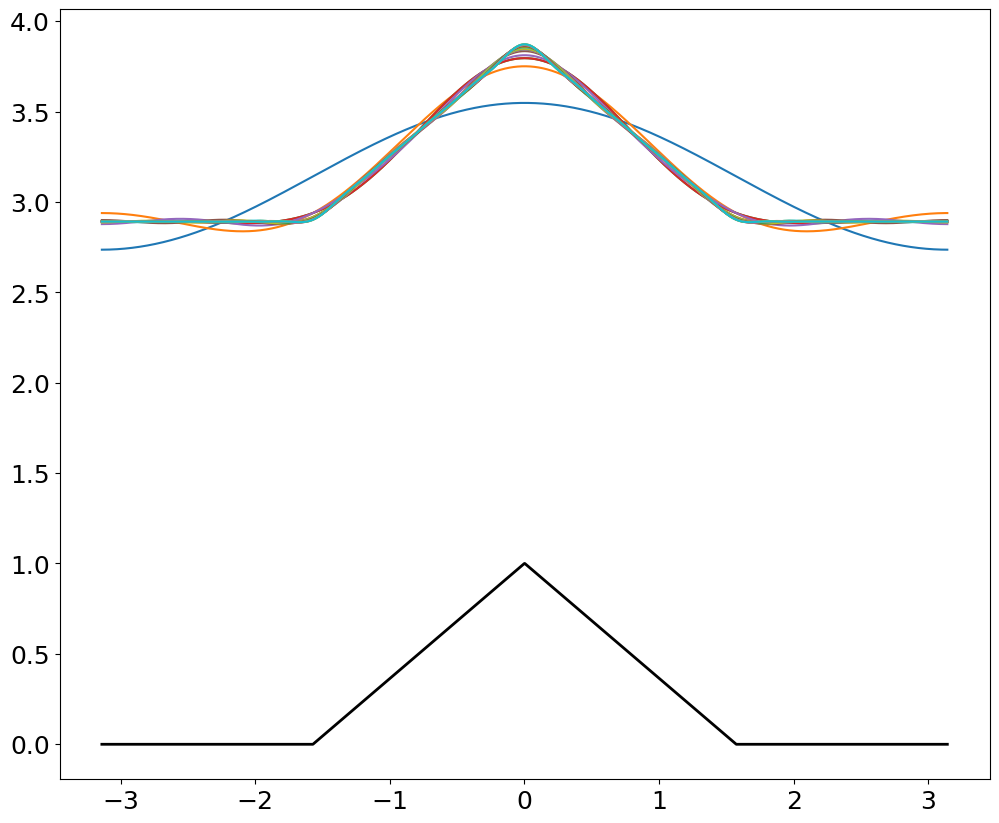

In [3]:
# Define the domain
dx = 0.001
L = np.pi
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define the hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

fig, ax = plt.subplots()
ax.plot(x,f,'-',color = 'k',linewidth = 2)

# Compute the Fourier Series
name = 'Accent'
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color = colors)

A0 = np.sum(L*np.ones_like(x))*dx

fFS = A0/2

A = np.zeros(20)
B = np.zeros(20)

for k in range(20):
  A[k] = np.sum(f*np.cos(np.pi*(k+1)*x/L)) * dx
  B[k] = np.sum(f*np.sin(np.pi*(k+1)*x/L)) * dx
  fFS += A[k]*np.cos(np.pi*(k+1)*x/L) + B[k]*np.sin(np.pi*(k+1)*x/L)
  ax.plot(x,fFS,'-')

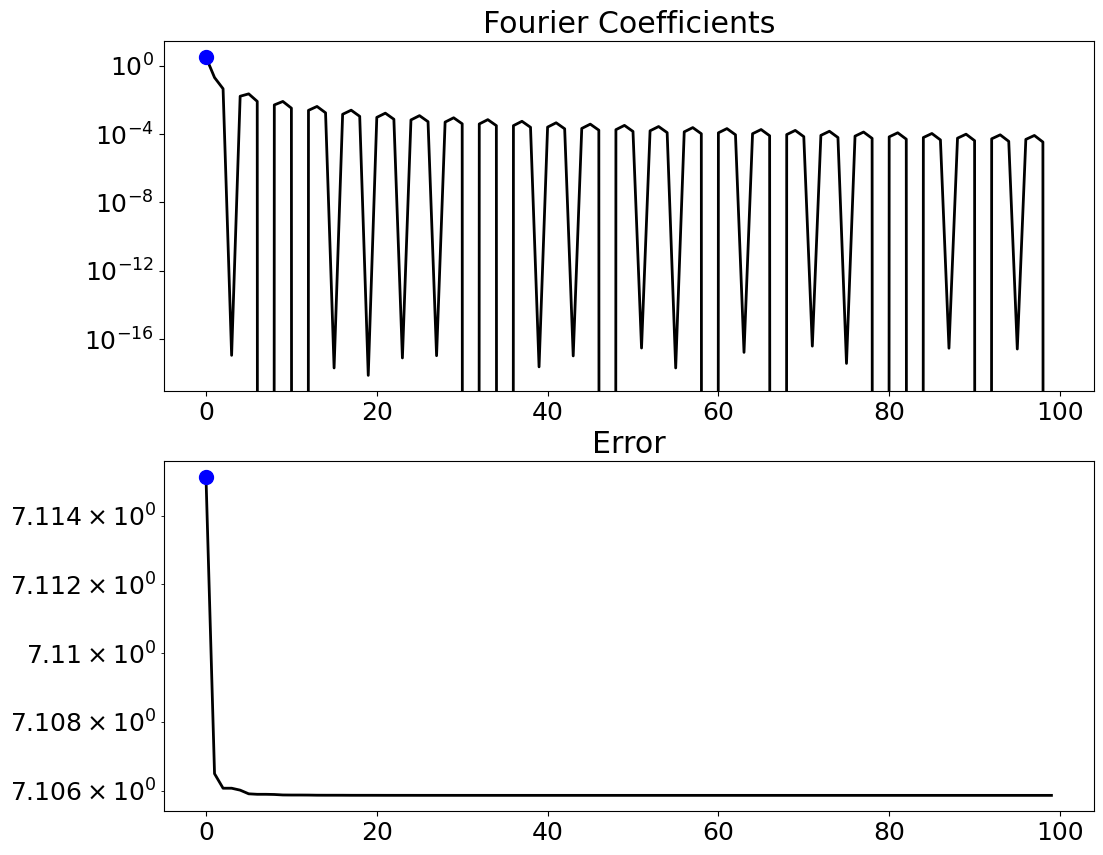

In [4]:
fFS = (A0 / 2) * np.ones_like(f)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax)

A[0] = A0 / 2
ERR[0] = np.linalg.norm(f - fFS) / np.linalg.norm(f)

for k in range(1, kmax):
    A[k] = np.sum(f * np.cos(np.pi * (k+1) * x / L)) * dx
    B[k] = np.sum(f * np.sin(np.pi * (k+1) * x / L)) * dx
    fFS += A[k] * np.cos(np.pi * (k+1) * x / L) + B[k] * np.sin(np.pi * (k+1) * x / L)
    ERR[k] = np.linalg.norm(f - fFS) / np.linalg.norm(f)
thres = np.median(ERR) * np.sqrt(kmax) * (4 / np.sqrt(3))
# Check if any elements satisfy the condition
indices = np.where(ERR > thres)[0]
if len(indices) > 0:
    r = np.max(indices)
else:
    r = 0

fig, axs = plt.subplots(2, 1)
axs[0].semilogy(np.arange(kmax), A, color='k', linewidth=2)
axs[0].semilogy(r, A[r], 'o', color='b', markersize=10)
plt.sca(axs[0])
plt.title('Fourier Coefficients')
axs[1].semilogy(np.arange(kmax), ERR, color='k', linewidth=2)
axs[1].semilogy(r, ERR[r], 'o', color='b', markersize=10)
plt.sca(axs[1])
plt.title('Error')
plt.show()

#Gibbs Phenomenon

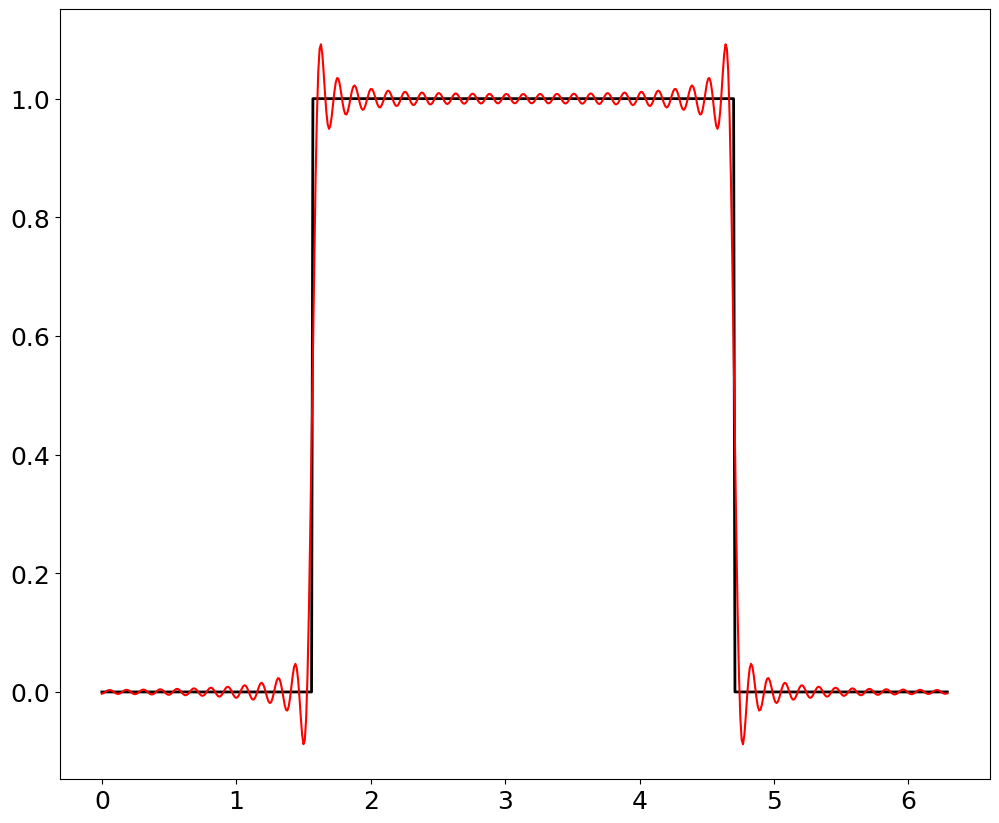

In [5]:
# Define the domain
dx = 0.01
L = 2*np.pi
x = np.arange(0,L+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define the square function
f = np.zeros_like(x)
f[nquart:3*nquart] = 1

# Compute the Fourier Series
A0 = np.sum(f*np.ones_like(x))*dx*1/L
fFS = A0/2 * np.ones_like(f)
for k in range(100):
  A[k] = np.sum(f*np.cos(np.pi*(k+1)*x/L)) * dx *1/L
  B[k] = np.sum(f*np.sin(np.pi*(k+1)*x/L)) * dx *1/L
  fFS += A[k]*np.cos(np.pi*(k+1)*x/L) + B[k]*np.sin(np.pi*(k+1)*x/L)
plt.plot(x,f,color = 'k',linewidth = 2)
plt.plot(x,fFS,'-',color = 'r',linewidth = 1.5)
plt.show()

#Denoising the data

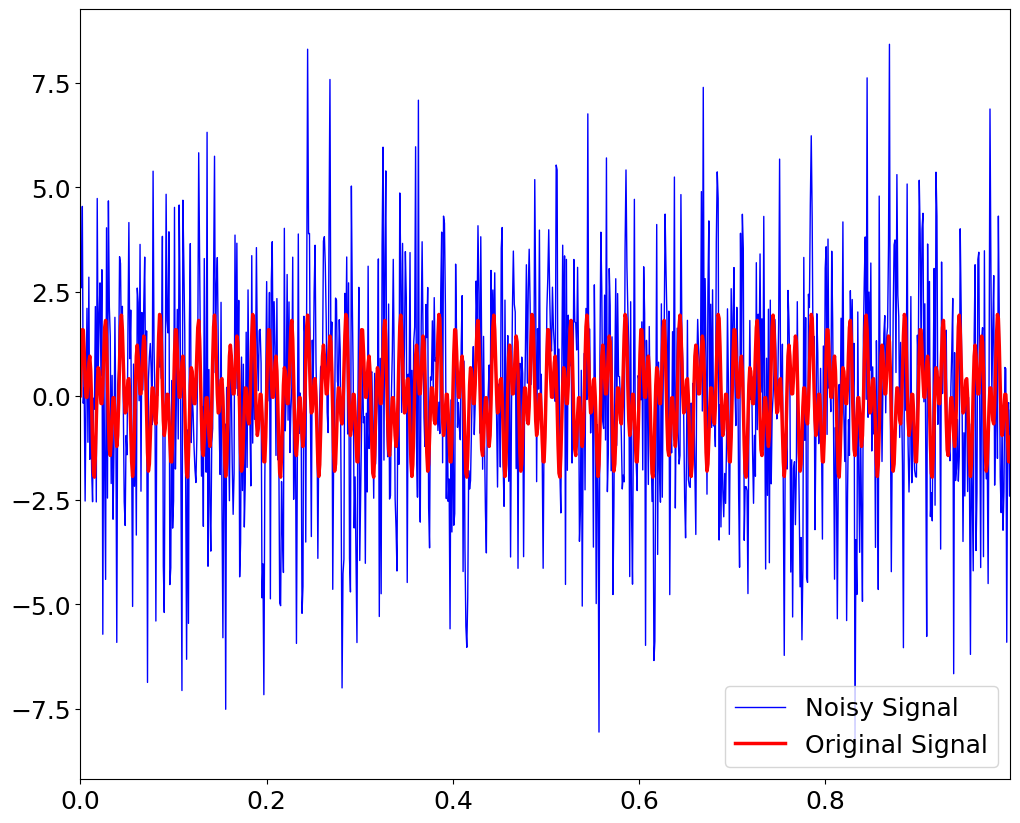

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
dt = 0.001  # Sampling frequency 1/(Hz)
t = np.arange(0, 1, dt)  # Time vector from 0 to 1 second with sampling frequency fs

# Generate the signal
f_c = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_n = f_c + 2.5*np.random.randn(len(t))

plt.plot(t, f_n, color = 'b', linewidth = 1 , label = 'Noisy Signal')
plt.plot(t, f_c, color = 'r', linewidth = 2.5 , label = 'Original Signal')

plt.xlim(t[0],t[-1])
plt.legend()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


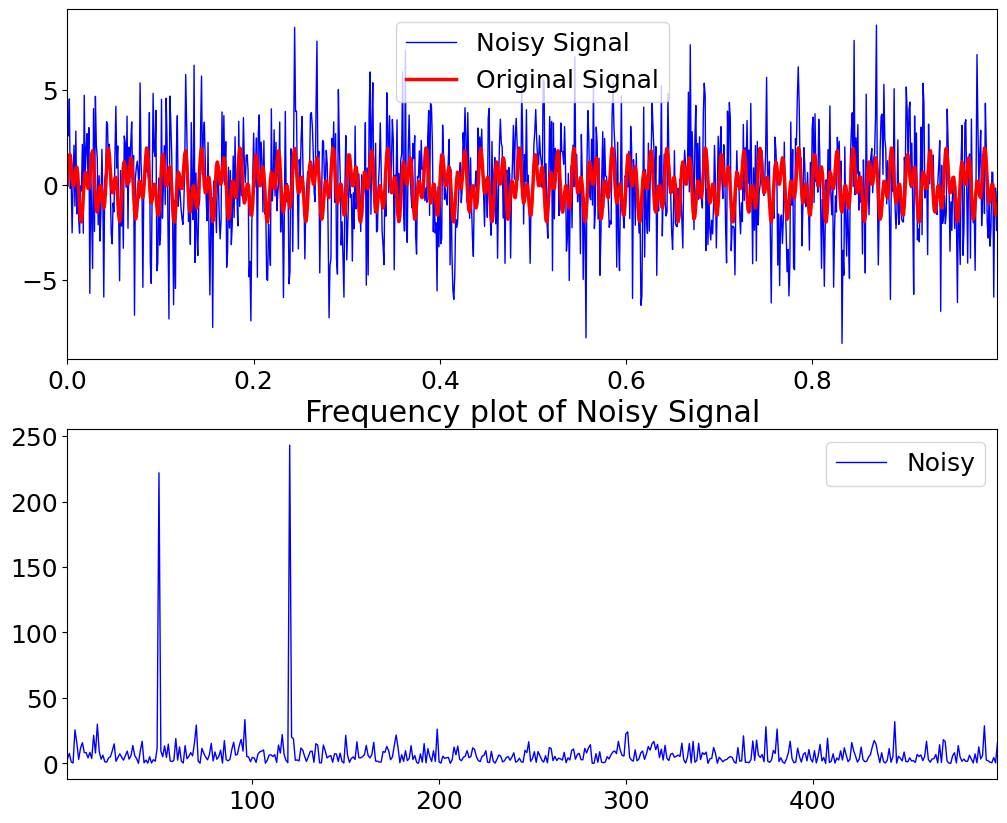

In [7]:
n = len(t)
# Compute the FFT
fhat = np.fft.fft(f_n,n)          #This calculates the complex Fourier coefficients of the signal.
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype = 'int')
# Compute the power spectrum (squared magnitude of FFT)
# So the power spectrum gives the power (energy) of each frequency component in the signal.
PSD = fhat*np.conj(fhat) / n

fig, axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t, f_n, color = 'b', linewidth = 1 , label = 'Noisy Signal')
plt.plot(t, f_c, color = 'r', linewidth = 2.5 , label = 'Original Signal')

plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color = 'b', linewidth = 1 , label = 'Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.title('Frequency plot of Noisy Signal')
plt.legend()

In [9]:
indices = PSD > 100       # setting threshold value of 100 to get back clean signal from the noisy one
PSDclean = PSD * indices
fhat = indices * fhat      # Filtered Signal Extracted
ffilt = np.fft.ifft(fhat)

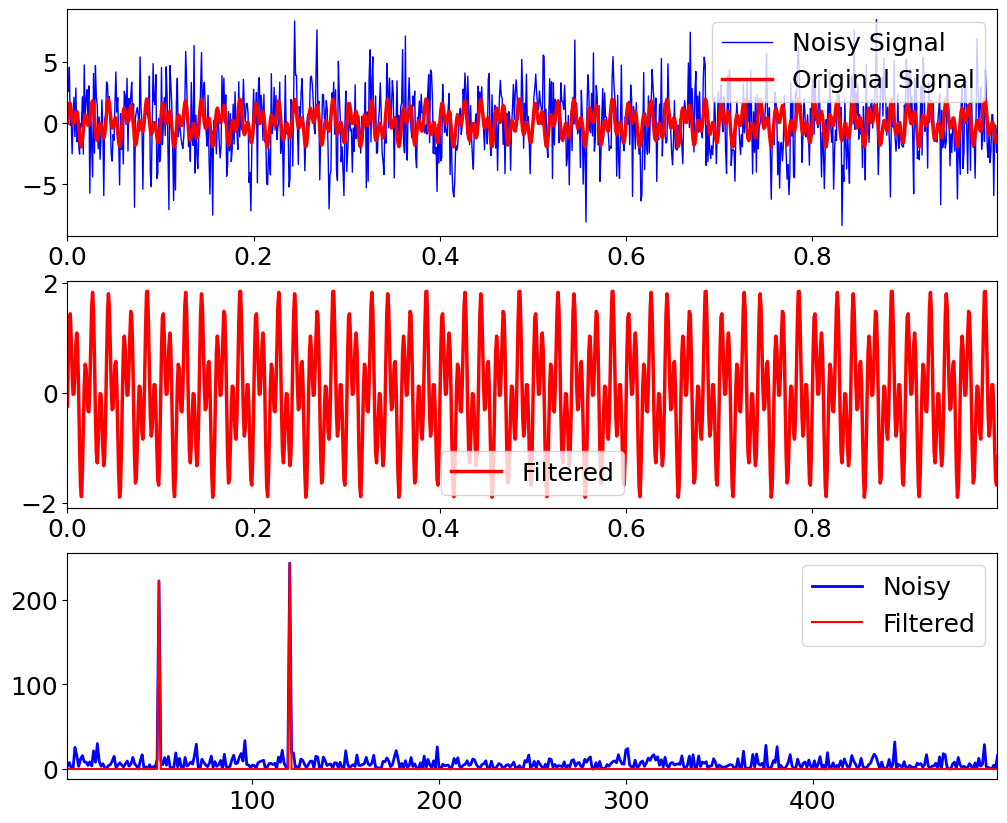

In [10]:
fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(t, f_n, color = 'b', linewidth = 1 , label = 'Noisy Signal')
plt.plot(t, f_c, color = 'r', linewidth = 2.5 , label = 'Original Signal')

plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color = 'r', linewidth = 2.5 , label = 'Filtered')
plt.xlim(t[0],t[-1])
plt.legend()


plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color = 'b', linewidth = 2 , label = 'Noisy')
plt.plot(freq[L], PSDclean[L], color = 'r', linewidth = 1.5 , label = 'Filtered')

plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

## Computing Derivatives using FFT

In [11]:
n = 128
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype = 'complex_')
f = np.cos(x) *np.exp(-np.power(x,2)/25)  # Function
df = -(np.sin(x)*np.exp(-np.power(x,2)/25)+(2/25)*x*f) # Derivative

The Finte Difference Derivative
$$f'_k = \frac{f_{k+1} - f_k}{\Delta x}$$



In [12]:
# Approximate derivatives using Finite Difference
dfFD = np.zeros(len(df),dtype='complex_')
for kappa in range(len(df)-1):
  dfFD[kappa] = (f[kappa+1]-f[kappa])/dx
dfFD[-1] = dfFD[-2]

$$ \mathcal{F} \frac{df}{dx} = i\kappa \mathcal{F}(f)$$

$\kappa$ = spatial Frequency (wavenumbes)

$\omega$ = temporal Frequency


In [13]:
# Derivatives usng FFT (spectral derivatives)
fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa)  # Reorder FFT frequency
dfhat = kappa*fhat*(1j)
dfFFT  = np.real(np.fft.ifft(dfhat))

From the plot below one can infer that spectral derivatives mimics the true derivative more efficiently than the one computed with Finite Difference

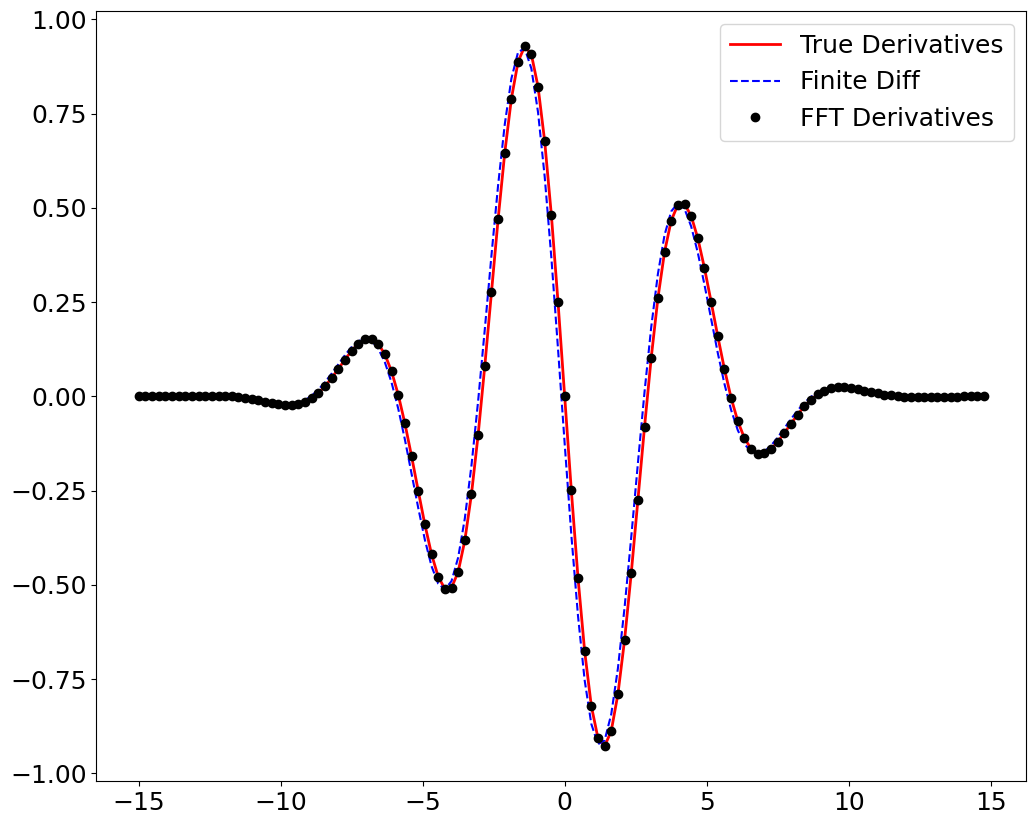

In [14]:
plt.plot(x,df.real,color='r',linewidth = 2, label = 'True Derivatives')
plt.plot(x,dfFD.real,'--',color='b',linewidth = 1.5 , label = 'Finite Diff')
plt.plot(x,dfFFT.real,'o',color='k',linewidth = 1.5, label = 'FFT Derivatives')
plt.legend()
plt.show()

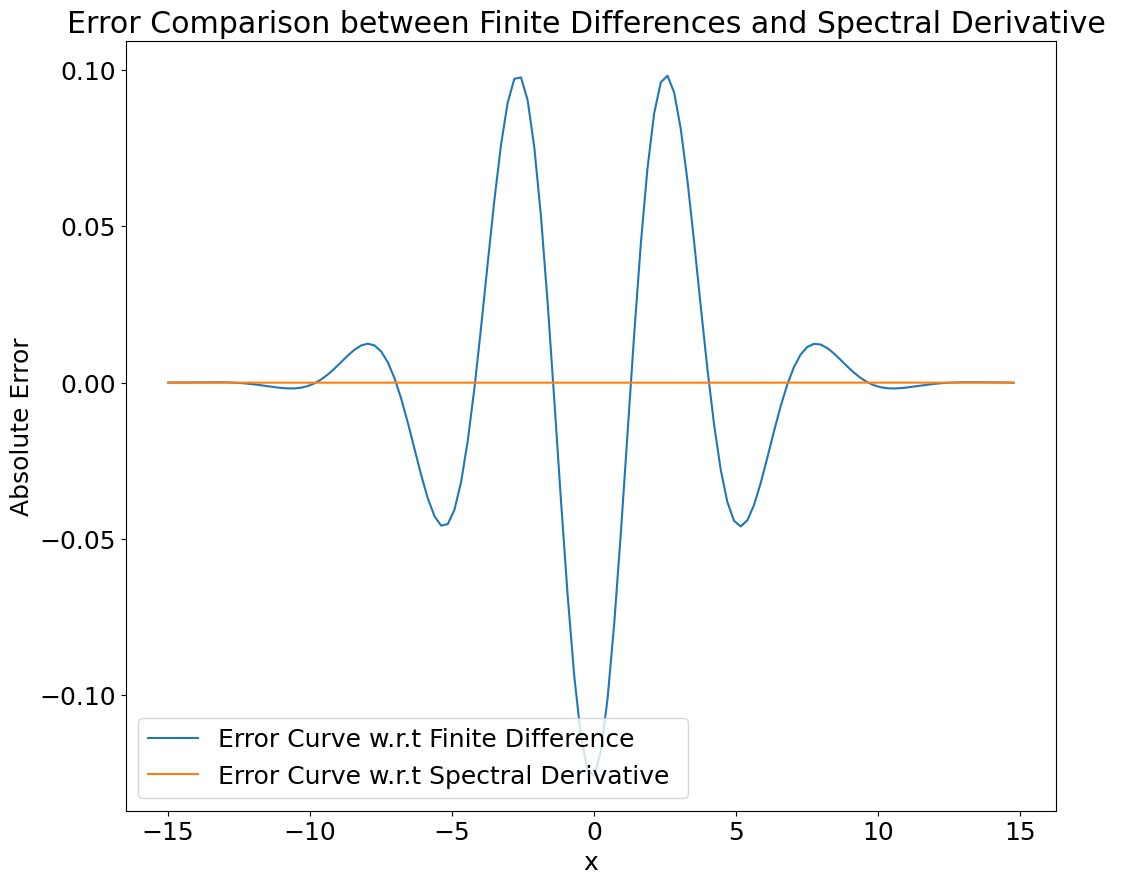

In [15]:
import matplotlib.pyplot as plt

# Calculate the absolute difference between dfFD and dfFFT
error1 = dfFD - df
error2 = dfFFT - df

# Plot the error curve
plt.plot(x, error1, label='Error Curve w.r.t Finite Difference ')
plt.plot(x, error2, label='Error Curve w.r.t Spectral Derivative ')

plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title('Error Comparison between Finite Differences and Spectral Derivative ')
plt.legend()
plt.show()


##Solving the Heat Eqation using FFT

$$u_t = \alpha^2 u_{xx}$$
taking the Fourier Transform
it becomes
$$\hat{u}_t = - \alpha^2 \kappa^2 \hat{u}$$
*n* decoupled ODEs one for each $\kappa_j$


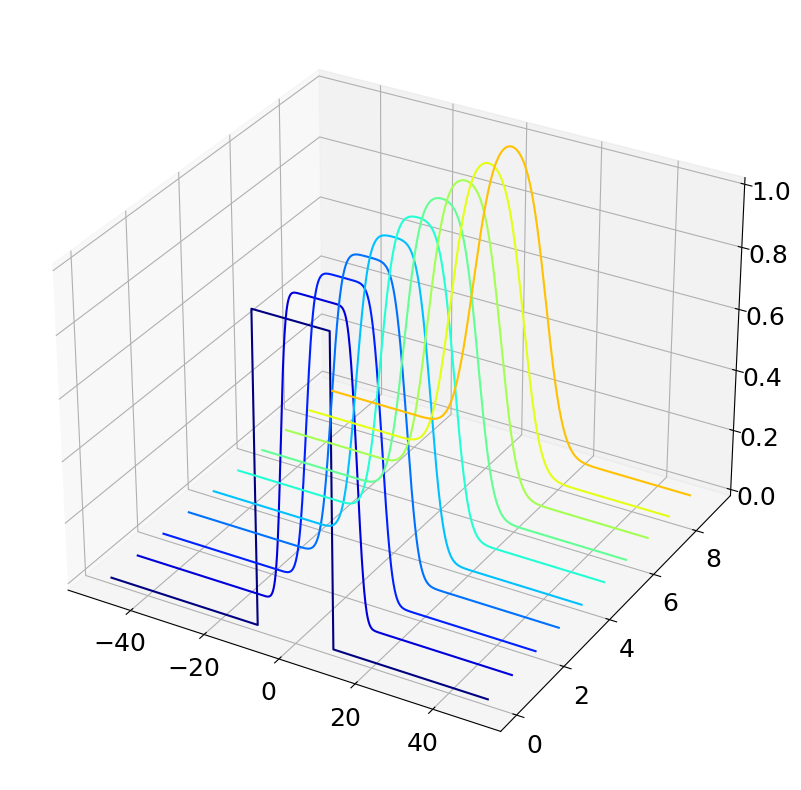

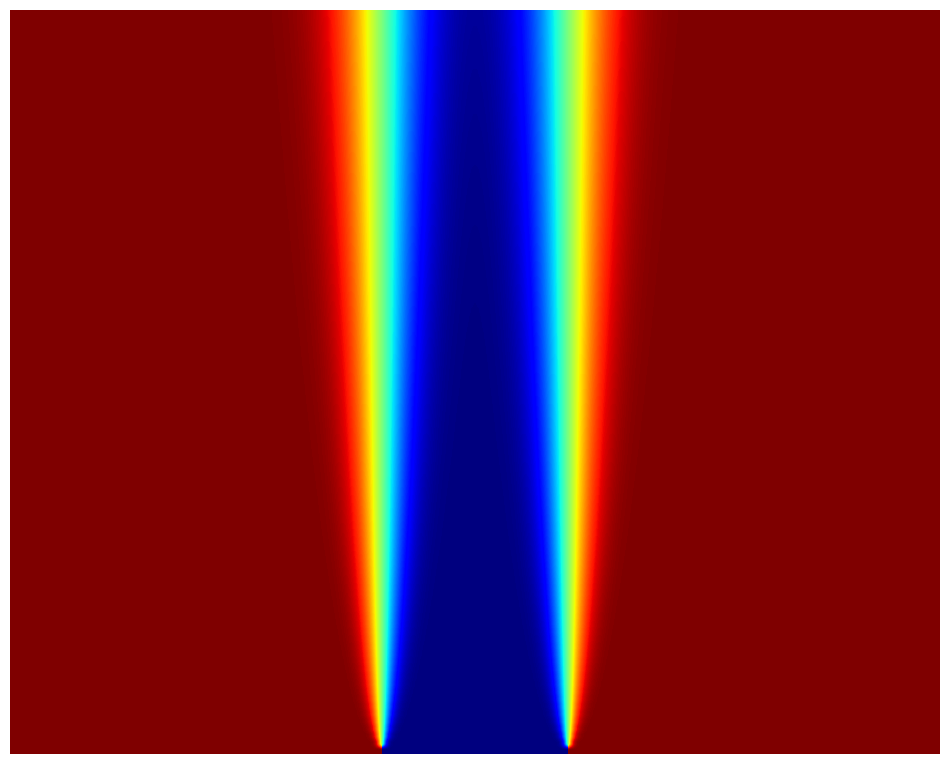

In [16]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
from scipy.integrate import odeint
a = 1        # thermal Diffusitivity
L = 100      # length of the domain
N = 1000     # number of the discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # x domain

# define the discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d = dx)

# initial Condtition
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0)

u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate the Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

def rhsHeat(uhat_ri, t, kappa, a):
  uhat = uhat_ri[:N] + (1j)* uhat_ri[N:]
  d_uhat = -a**2 * (np.power(kappa,2)) * uhat
  d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
  return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args = (kappa,a))
uhat = uhat_ri[:,:N] + (1j)*uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
  u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real

# waterfall plot

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.set_cmap('jet_r')
u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
  ys = j*np.ones(u_plot.shape[1])
  ax.plot(x,ys,u_plot[j,:],color = cm.jet(j*20))

plt.figure()
plt.imshow(np.flipud(u),aspect = 8)
plt.axis('off')
plt.set_cmap('jet_r')
plt.show()

# Image Compression Using FFT2

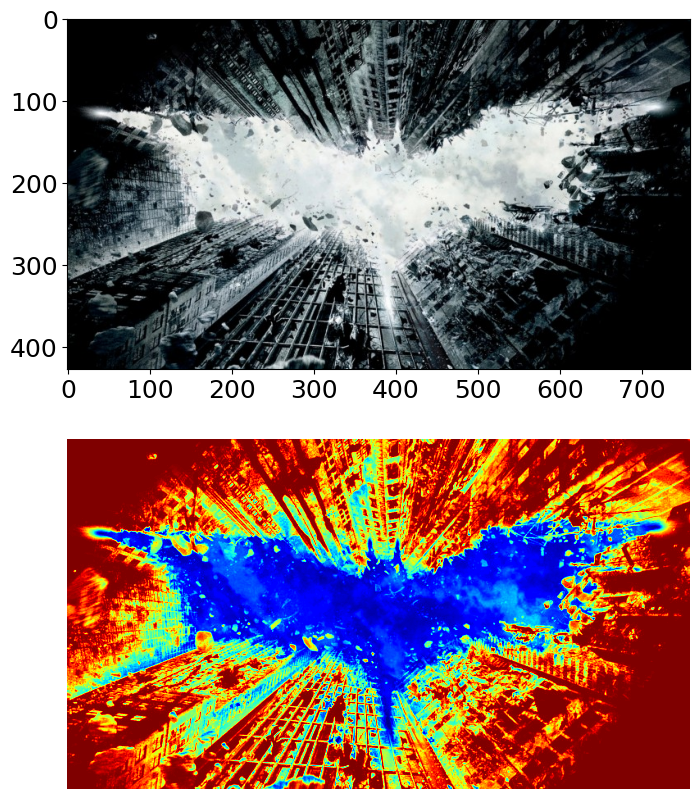

In [18]:
import os
from matplotlib.image import imread

# Get the current working directory
current_dir = os.getcwd()

# Specify the path to the uploaded image file
image_path = os.path.join(current_dir, 'dark_kight.jpg')

# Read the image using imread
A = imread(image_path)
B = np.mean(A,-1)
fig, axs = plt.subplots(2,1)
# Display the image
plt.sca(axs[0])
plt.imshow(A)
plt.sca(axs[1])
plt.imshow(B)
plt.axis('off')
plt.show()


Taking only the top x% coefficients to build the image  and we can observe that the image is quite visible even after keeping only top 0.1% coefficients

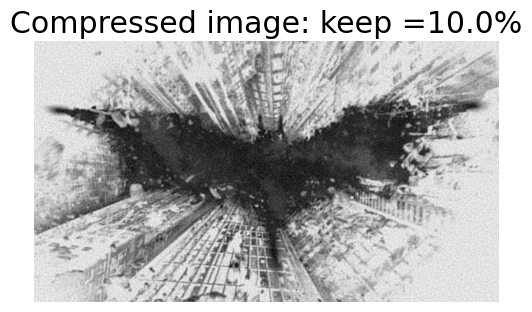

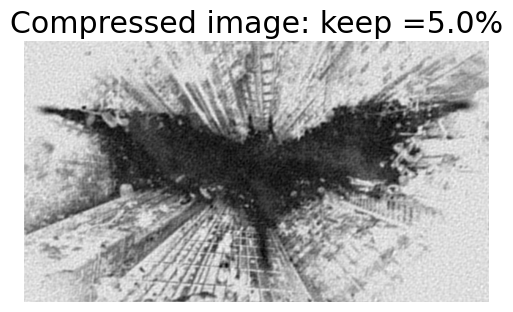

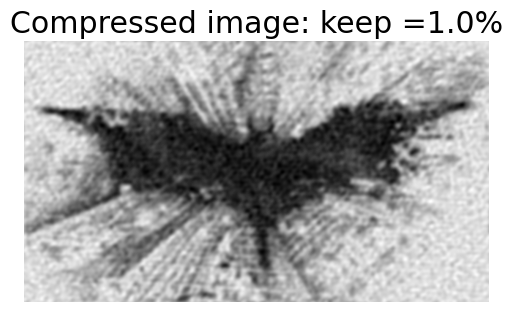

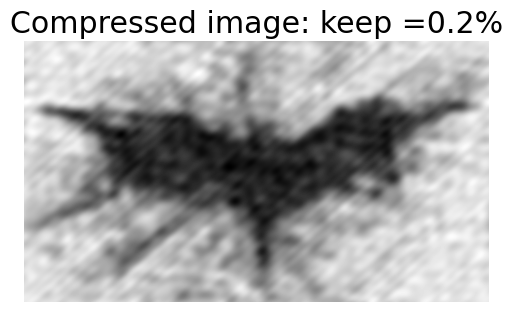

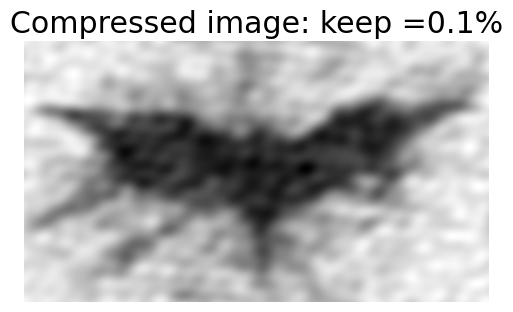

In [27]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1)))
for keep in (0.1,0.05,0.01,0.002,0.001):
  thres = Btsort[int(np.floor((1-keep)*len(Btsort)))]
  ind = np.abs(Bt)>thres
  Atlow = Bt*ind
  Atlow = np.fft.ifft2(Atlow).real
  plt.figure()
  plt.imshow(256-Atlow, cmap='gray')
  plt.axis('off')
  plt.title('Compressed image: keep ='+str(keep*100) +'%')


This is the Surface Plot showing that the image is actually constructed from Sines and Cosine of Different Frequencies. The peaks indicate frequencies that contribute significantly to the representation of the image.

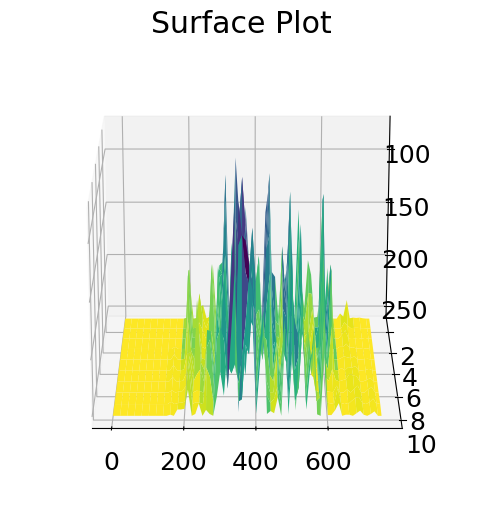

In [25]:
plt.rcParams['figure.figsize'] = [6,6]
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
X,Y = np.meshgrid(np.arange(1,np.shape(B)[1]+1),np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(X[0:10,0::10],Y[0:10,0::10],256-B[0:10,0::10],cmap='viridis',edgecolor = None)
ax.set_title('Surface Plot')
ax.mouse_init()
ax.view_init(200,270)
plt.show()